# Uso del Caos para Transmitir Mensajes Encriptados

## Ejercicio 3

In [1]:
using ChaosCrypto

In [2]:
using Interact

In [3]:
using PyPlot

### Ecuaciones de Lorenz

$\frac{dx}{dt}= \sigma (y - x)$

$\frac{dy}{dt} = rx -y -xz$

$\frac{dz}{dt} = xy -bz$

Si *x(t)* es la señal que se transmite.
Lo que se recibe es:

$xr = x(t)$

$yr = rx(t) -yr -x(t)zr$

$zr = x(t)yr -bzr$

Para este ejercicio:


Las ecuaciones de quien recibe el mensaje

$xr = \sigma(yr - xr)$ 
    
$yr = ρs(t) - yr - s(t)zr$
            
$zr = s(t)yr - \beta zr$

donde

$s(t) = x(t) + m(t)$

y $m(t) = sin(t)$

Los parámetros son:

In [4]:
ρ = 60
σ = 10
β = 8/3

2.6666666666666665

Implementación de Taylor 

In [5]:
t = linspace(0, 2π, 360)
h = Array(t)

360-element Array{Float64,1}:
 0.0      
 0.0175019
 0.0350038
 0.0525057
 0.0700076
 0.0875095
 0.105011 
 0.122513 
 0.140015 
 0.157517 
 0.175019 
 0.192521 
 0.210023 
 ⋮        
 6.09066  
 6.10817  
 6.12567  
 6.14317  
 6.16067  
 6.17817  
 6.19568  
 6.21318  
 6.23068  
 6.24818  
 6.26568  
 6.28319  

In [6]:
s=Array(Float64,360)
for i in 1:360
    s[i] = sin(t[i])
    end
    
push!(s) 

 in depwarn at deprecated.jl:73
 in push! at deprecated.jl:439
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/Yuriko/.julia/v0.4/IJulia/src/execute_request.jl:183
 in eventloop at /Users/Yuriko/.julia/v0.4/IJulia/src/IJulia.jl:143
 in anonymous at task.jl:447
while loading In[6], in expression starting on line 6


360-element Array{Float64,1}:
  0.0        
  0.017501   
  0.0349967  
  0.0524816  
  0.0699505  
  0.0873979  
  0.104819   
  0.122207   
  0.139558   
  0.156867   
  0.174127   
  0.191334   
  0.208482   
  ⋮          
 -0.191334   
 -0.174127   
 -0.156867   
 -0.139558   
 -0.122207   
 -0.104819   
 -0.0873979  
 -0.0699505  
 -0.0524816  
 -0.0349967  
 -0.017501   
 -2.44929e-16

In [7]:
typeof(ans)

Array{Float64,1}

In [8]:
function lorenzSin(xx,t)
    x, y, z, xr, yr, zr = xx
    
    m = sin(φ*t)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end



lorenzSin (generic function with 1 method)

In [9]:
function lorenzSinTaylor(xx, t) 
    x, y, z, xr, yr, zr = xx #6 ecuaciones de Lorenz
    φ = 0.001 
    m = sin(φ*t) #Mensaje, señal
    #t = linspace(0, 2π/φ, 360) 
    #h = Array(t) #Arreglo de linspace
    
    
    s = x + m #es un arreglo
    #s = Array(Float64,length(t)) #s es un arreglo de tamaño t de números flotantes
    #for i in eachindex(t)#1:360 Para cada i de t
    #    s[i] = sin(φ*t[i]) #Entrada i del arreglo s
    #end
    
    

        #Entrada 1 de xx, correspondiente a la ecuación x
    [AD.Taylor(x, [σ]) * (AD.Taylor(x, [y]) - AD.Taylor(x, [x])),
        #Entrada 2 de xx, correspondiente a la ecuación y
    (AD.Taylor(y, [ρ]) * AD.Taylor(y, [x])) - AD.Taylor(y,[y]) - (AD.Taylor(y, [x]) * AD.Taylor(y, [z])), 
        #Entrada 3 de xx, correspondiente a la ecuación z
    (AD.Taylor(z, [x]) * AD.Taylor(z, [y])) - (AD.Taylor(z, [β]) * AD.Taylor(z, [z])),
        #Entrada 4 de xx, correspondiente a la ecuación xr
    AD.Taylor(xr, [σ]) * (AD.Taylor(xr, [yr]) - AD.Taylor(xr, [xr])),
        #Entrada 5 de xx, correspondiente a la ecuación yr
    (AD.Taylor(yr, [ρ]) * AD.Taylor(yr, [s])) - AD.Taylor(yr, [yr]) - (AD.Taylor(yr, [s]) * AD.Taylor(yr, [zr])),
        #Entrada 6 de xx, correspondiente a la ecuación zr
    (AD.Taylor(zr, [s]) * AD.Taylor(zr, [yr])) -  (AD.Taylor(zr, [β]) * AD.Taylor(zr, [zr]))]

    
#    xyz = eqs_dif(AD.Taylor(x, [x]), AD.Taylor(y, [y]), AD.Taylor(z, [z]), 
#        AD.Taylor(x, [σ]), AD.Taylor(y, [ρ]), AD.Taylor(z, [β]))
#    xyzs = eqs_dif_S(AD.Taylor(xr, [x]), AD.Taylor(yr, [yr]), AD.Taylor(zr, [zr]), AD.Taylor(xr, [s]), 
#        AD.Taylor(xr, [σ]), AD.Taylor(yr, [ρ]), AD.Taylor(zr, [β]))

#    xyz..., xyzs...
end

lorenzSinTaylor (generic function with 1 method)

In [10]:
lorenzSinTaylor([1.0,1.0,1.0,1.0,1.0,1.0], 0.0)

6-element Array{ChaosCrypto.AD.Taylor{Float64,Float64},1}:
 ChaosCrypto.AD.Taylor{Float64,Float64}(1.0,[0.0,0.0])                
 ChaosCrypto.AD.Taylor{Float64,Float64}(1.0,[58.0,-1.0])              
 ChaosCrypto.AD.Taylor{Float64,Float64}(1.0,[-1.6666666666666665,0.0])
 ChaosCrypto.AD.Taylor{Float64,Float64}(1.0,[0.0,0.0])                
 ChaosCrypto.AD.Taylor{Float64,Float64}(1.0,[58.0,-1.0])              
 ChaosCrypto.AD.Taylor{Float64,Float64}(1.0,[-1.6666666666666665,0.0])

In [11]:
function eqs_dif(x, y, z, σ, ρ, β)
    xdot = σ * ( y - x )
    ydot = ρ * x - y - x * z
    zdot = x * y - β * z
    return xdot, ydot, zdot
end

function eqs_dif_S(x, y, z, s, σ, ρ, β)
    xdot = σ * ( y - x )
    ydot = ρ * s - y - s * z
    zdot = s * y - β * z
    return xdot, ydot, zdot
end

eqs_dif_S (generic function with 1 method)

In [12]:
eqs_dif(1.0, 1.0, 1.0, σ, ρ, β)

(0.0,58.0,-1.6666666666666665)

In [13]:
eqs_dif(AD.Taylor(1.0, [1.0]), AD.Taylor(1.0, [1.0]), AD.Taylor(1.0, [1.0]), 
    AD.Taylor(1.0, [σ]), AD.Taylor(1.0, [ρ]), AD.Taylor(1.0, [β]))

(ChaosCrypto.AD.Taylor{Float64,Float64}(1.0,[0.0,0.0]),ChaosCrypto.AD.Taylor{Float64,Float64}(1.0,[58.0,-1.0]),ChaosCrypto.AD.Taylor{Float64,Float64}(1.0,[-1.6666666666666665,0.0]))

In [14]:
xsSinTaylor, tsSinTaylor = LO.integrador([1.0,1.0,1.0,1.0,1.0,1.0], lorenzSinTaylor, 30.0) 

([[1.0,1.0,1.0,1.0,1.0,1.0],[1.0,1.0579995,0.9983333333333333,1.0,1.0579995,0.9983333333333333],[1.000579995,1.1159426381669166,0.996729110611111,1.000579995,1.1159426971685833,0.9967291116691106],[1.0017336214316692,1.173863630048919,0.9951877561954654,1.001733622021686,1.1738638069970377,0.9951877595415649],[1.0034549215178417,1.231796283737937,0.99370982084414,1.0034549238714394,1.231796637520104,0.9937098278801628],[1.0057383351400426,1.2897740238368411,0.9922959800317798,1.0057383410079261,1.2897746132831494,0.992295992331231],[1.0085786920270106,1.3478299149274717,0.9909470325978023,1.0085787037306784,1.3478307988101887,0.9909470519061567],[1.0119712042560152,1.4059966845572018,0.9896638997102138,1.0119712246814734,1.405997921590438,0.9896639279455295],[1.015911459059027,1.4643067457612648,0.9884476241357046,1.015911491650563,1.4643083946006283,0.9884476633895535],[1.0203954119260494,1.5227922191376333,0.9872993698072724,1.0203954606800636,1.5227943383798732,0.9872994223459862]  

In [15]:
#Integrador usando la función lorenzSinTaylor del módulo LO 
#con condición inicial 1.0 para las 6 ecuaciones y tiempo final 30

xsSinTaylor, tsSinTaylor = LO.integrador([1.0,1.0,1.0,1.0,1.0,1.0], lorenzSinTaylor, 30.0) 

([[1.0,1.0,1.0,1.0,1.0,1.0],[1.0,1.0579995,0.9983333333333333,1.0,1.0579995,0.9983333333333333],[1.000579995,1.1159426381669166,0.996729110611111,1.000579995,1.1159426971685833,0.9967291116691106],[1.0017336214316692,1.173863630048919,0.9951877561954654,1.001733622021686,1.1738638069970377,0.9951877595415649],[1.0034549215178417,1.231796283737937,0.99370982084414,1.0034549238714394,1.231796637520104,0.9937098278801628],[1.0057383351400426,1.2897740238368411,0.9922959800317798,1.0057383410079261,1.2897746132831494,0.992295992331231],[1.0085786920270106,1.3478299149274717,0.9909470325978023,1.0085787037306784,1.3478307988101887,0.9909470519061567],[1.0119712042560152,1.4059966845572018,0.9896638997102138,1.0119712246814734,1.405997921590438,0.9896639279455295],[1.015911459059027,1.4643067457612648,0.9884476241357046,1.015911491650563,1.4643083946006283,0.9884476633895535],[1.0203954119260494,1.5227922191376333,0.9872993698072724,1.0203954606800636,1.5227943383798732,0.9872994223459862]  

In [16]:
#xsSinTaylor es un arreglo de un arreglo de números flotantes

typeof(xsSinTaylor) 

Array{Array{Float64,1},1}

In [17]:
typeof(xsSinTaylor) 

Array{Array{Float64,1},1}

In [18]:
#Tamaño de xsSinTaylor
length(xsSinTaylor)

30001

In [19]:
#Entradas 1 y 4 de la tercera entrada de la integración (xsSinTaylor, tsSinTaylor)

xsSinTaylor[3][1], xsSinTaylor[3][4] 

(1.000579995,1.000579995)

In [20]:
xsSinTaylor[3][1], xsSinTaylor[3][4] 

(1.000579995,1.000579995)

In [21]:


xxST = Float64[] #Es un número flotante
xxrST = Float64[] #Es un número flotante

for i = 1:length(xsSinTaylor) #Para cada i desde 1 hasta tamaño del arreglo de xxSinTaylor
    push!(xxST, xsSinTaylor[i][1]) #Agregar el número xxST al arreglo xsSinTaylor
    push!(xxrST, xsSinTaylor[i][4])
end

In [22]:
length(xxST) #Tamaño de xxST

30001

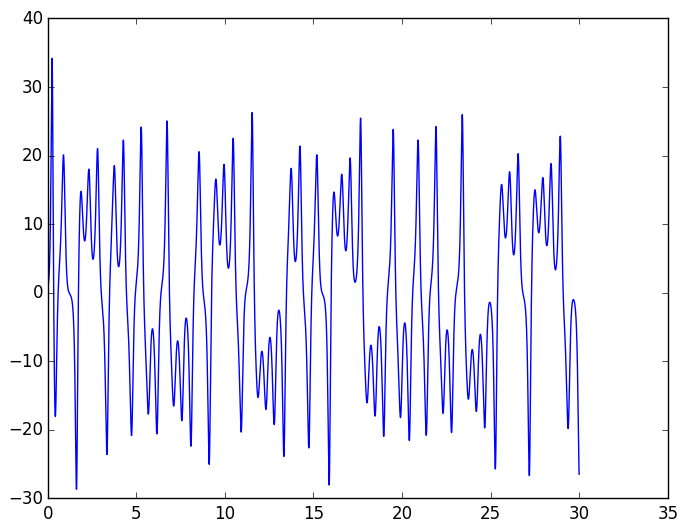

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d4d2f90>

In [23]:
#Gráfica de x vs. xr 
plot(tsSinTaylor, xxST)

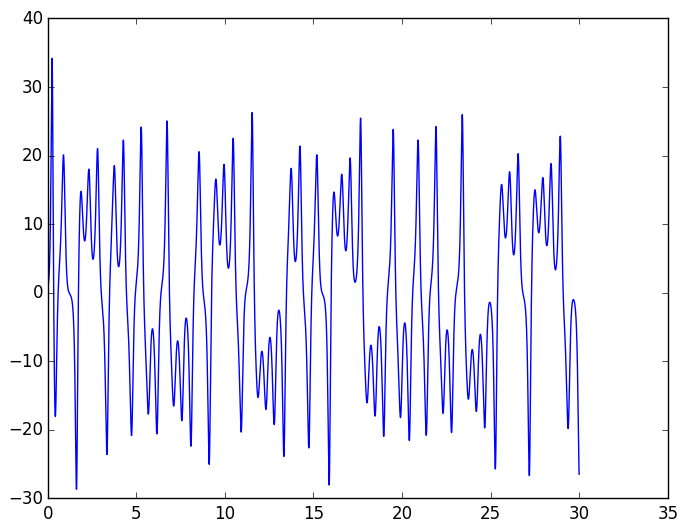

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31d8e9790>

In [24]:
plot(tsSinTaylor, xxST)

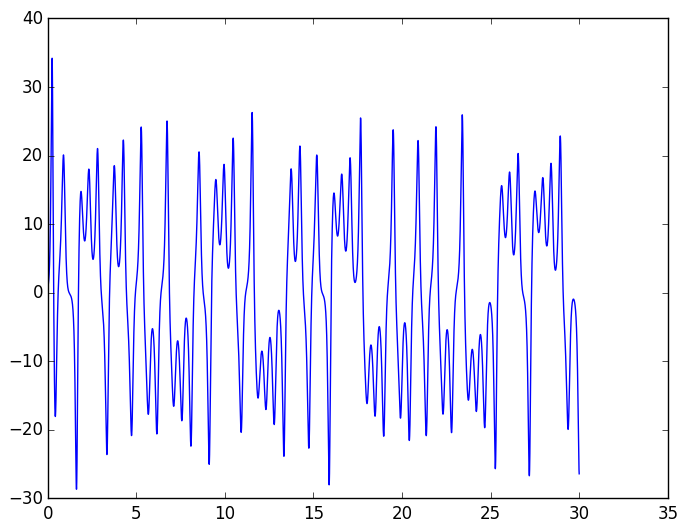

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31db93e10>

In [25]:
plot(tsSinTaylor, xxrST)

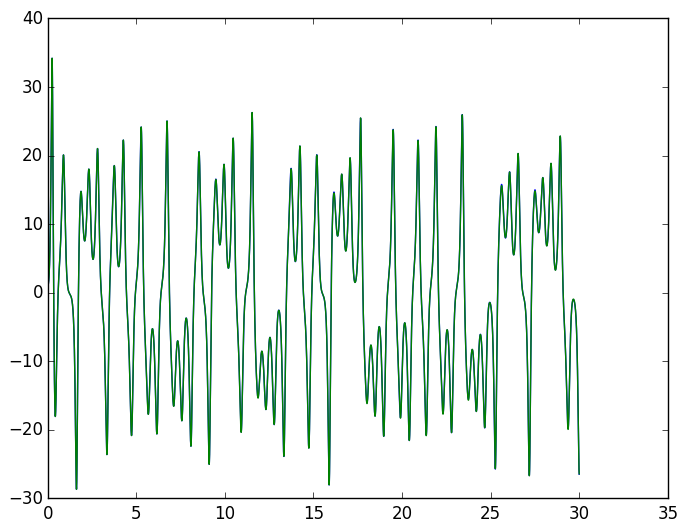

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ae58e50>
 PyObject <matplotlib.lines.Line2D object at 0x31e107150>

In [26]:
#Gráfica de xxST en azul
plot(tsSinTaylor, xxST, tsSinTaylor, xxrST)

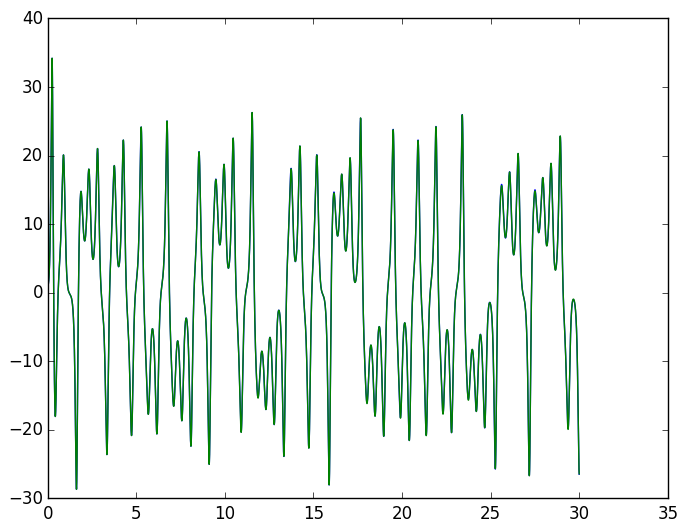

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e507d50>
 PyObject <matplotlib.lines.Line2D object at 0x31e518050>

In [27]:
plot(tsSinTaylor, xxST, tsSinTaylor, xxrST)

In [28]:
xsSinTaylor[3][2], xsSinTaylor[3][5]

(1.1159426381669166,1.1159426971685833)

In [29]:
xxST = Float64[]
xxrST = Float64[]
for i = 1:length(xsSinTaylor)
    push!(xxST, xsSinTaylor[i][2])
    push!(xxrST, xsSinTaylor[i][5])
end

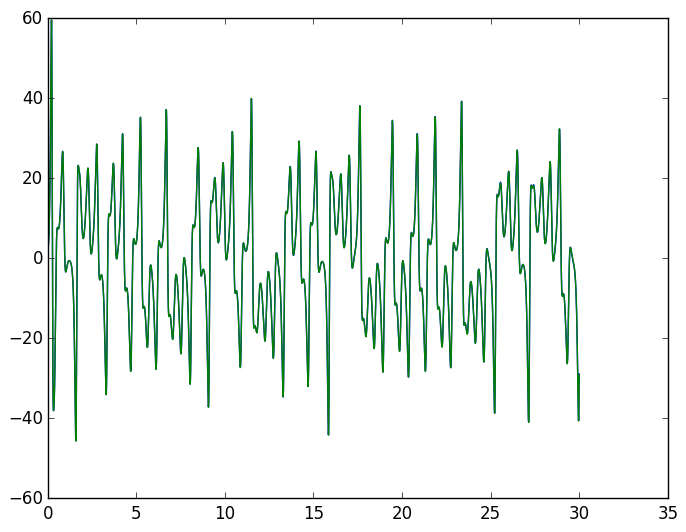

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31e9da910>
 PyObject <matplotlib.lines.Line2D object at 0x31e9dabd0>

In [30]:
plot(tsSinTaylor, xxST, tsSinTaylor, xxrST)

In [31]:
xsSinTaylor[3][3], xsSinTaylor[3][6]

(0.996729110611111,0.9967291116691106)

In [32]:
xxST = Float64[]
xxrST = Float64[]
for i = 1:length(xsSinTaylor)
    push!(xxST, xsSinTaylor[i][3])
    push!(xxrST, xsSinTaylor[i][6])
end

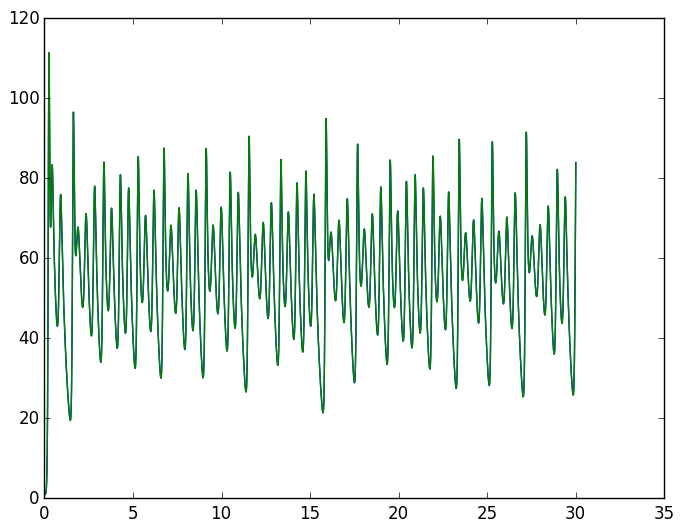

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ee94cd0>
 PyObject <matplotlib.lines.Line2D object at 0x31ee94f90>

In [33]:
plot(tsSinTaylor, xxST, tsSinTaylor, xxrST)

φ = φ = 1.6180339887498...


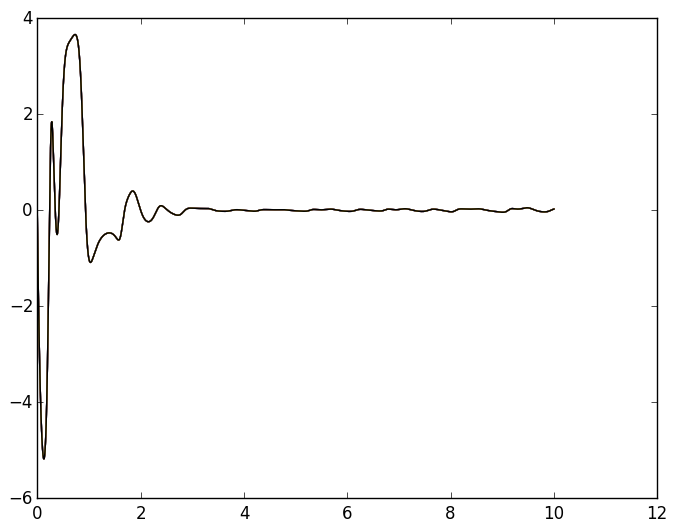

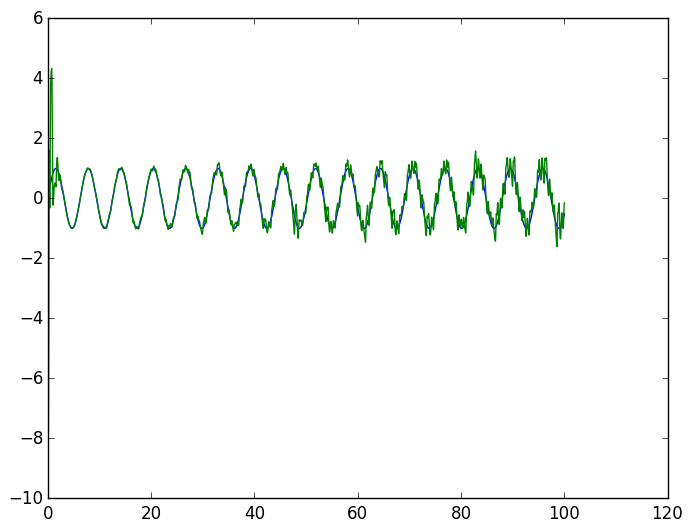

In [58]:
#σ=16.
#ρ=45.6
#β=4.

ρ = 60
σ = 10
β = 8/3


fig = figure()
#@manipulate for φ in .001:.01:.1
    withfig(fig) do
    @show(φ)


function lorenzSin(xx,t)
    x, y, z, xr, yr, zr = xx
    m = sin(φ*t/10)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

#xs, ts = RK.integrar(lorenzSin,[1., 1., 1., 10., 10., 10.],0. ,100. ,1e-3);
xs, ts = LO.integrador([1.0,1.0,1.0,10.0,10.0,10.0], lorenzSinTaylor, 100.0)
    
    m=sin( ts)
s=[x[1] for x in xs]+m
mhat = s-[x[4] for x in xs]
plot(ts,m)
plot(ts,mhat)
#    plot(ts,[x[1] for x in xs])
#    plot(ts,[x[4] for x in xs])
#    plot(ts,[x[1]-x[4] for x in xs])



end

#end # @manipulate

Interact.Slider{Float64}(Signal{Float64}(0.041, nactions=0),"φ",0.041,0.001:0.01:0.091,true)

φ = 0.041


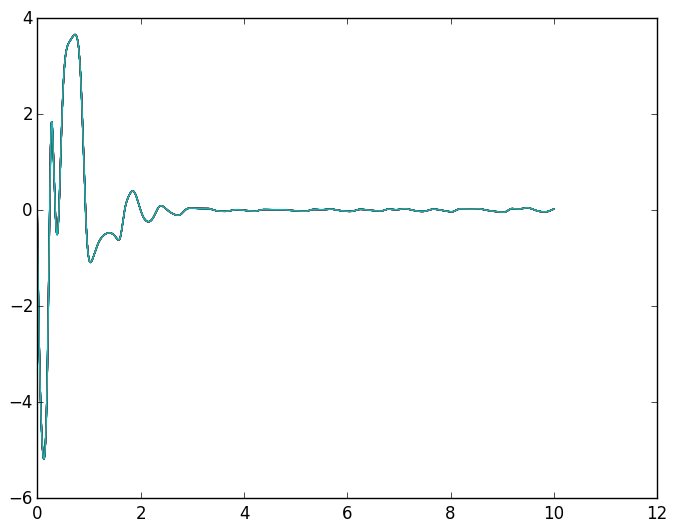

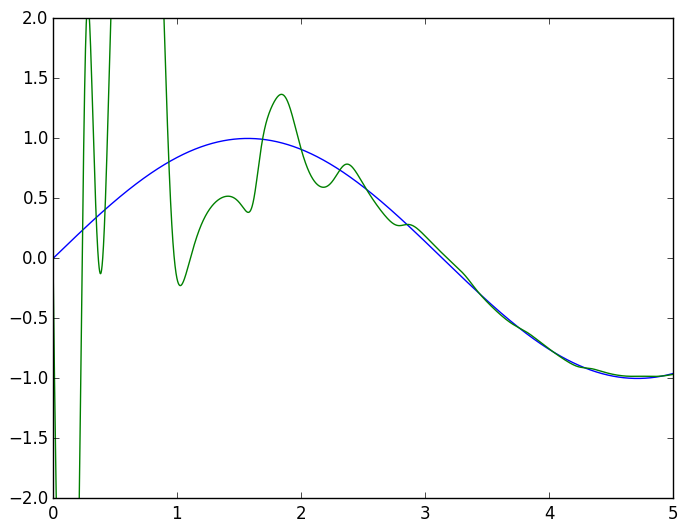

In [57]:


ρ = 60
σ = 10
β = 8/3


fig = figure()
@manipulate for φ in .001:.01:.1
    withfig(fig) do
    @show(φ)
xlim(0.0,5)
        ylim(-2.0, 2.0)


#function lorenzSin(xx,t)
#    x, y, z, xr, yr, zr = xx
#    m = sin(φ*t)
#    s = x + m
    
#    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
#     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
#end

#xs, ts = RK.integrar(lorenzSin,[1., 1., 1., 10., 10., 10.],0. ,100. ,1e-3);
xs, ts = LO.integrador([1.0,1.0,1.0,1.0,10.0,10.0], lorenzSinTaylor, 10.0)
    
m=sin(ts)
s=[x[1] for x in xs]+m
mhat = s-[x[4] for x in xs]
    plot(ts,m) #Graficar ts contra sen, el mensaje
    plot(ts,mhat) #Graficar ts contra el mensaje recibido
#    plot(ts,[x[1] for x in xs])
#    plot(ts,[x[4] for x in xs])

fig=figure(2)
plot(ts,[x[1]-x[4] for x in xs])



end

end # @manipulate


φ = φ = 1.6180339887498...


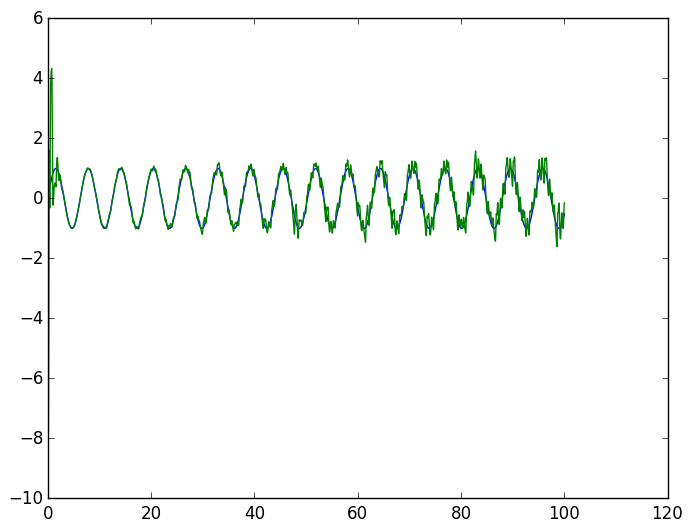

In [36]:
σ=16.
ρ=45.6
β=4.

ρ = 60
σ = 10
β = 8/3


fig = figure()
#@manipulate for φ in .001:.01:.1
    withfig(fig) do
    @show(φ)
#ylim(-0.5,0.5)



function lorenzSin(xx,t)
    x, y, z, xr, yr, zr = xx
    m = sin(φ*t/10)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

#xs, ts = RK.integrar(lorenzSin,[1., 1., 1., 10., 10., 10.],0. ,100. ,1e-3);
xs, ts = LO.integrador([1.0,1.0,1.0,10.0,10.0,10.0], lorenzSinTaylor, 100.0)
    
m=sin(ts)
s=[x[1] for x in xs]+m
mhat = s-[x[4] for x in xs]
    plot(ts,m) #Graficar ts contra sen, el mensaje
    plot(ts,mhat) #Graficar ts contra el mensaje recibido
#    plot(ts,[x[1] for x in xs])
#    plot(ts,[x[4] for x in xs])
#    plot(ts,[x[1]-x[4] for x in xs])



end

#end # @manipulate



Interact.Options{:ToggleButtons,Float64}(Signal{Float64}(0.001, nactions=0),"φ",0.001,"0.001",Interact.OptionDict(Any["0.001","0.1"],Dict{Any,Any}("0.001"=>0.001,"0.1"=>0.1)),Any[],Any[])

φ = 0.001


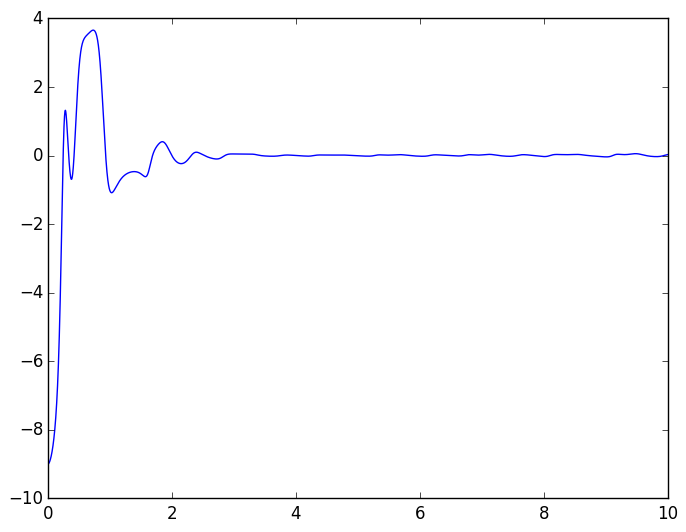

In [37]:
#σ=16.
#ρ=45.6
#β=4.

ρ = 60
σ = 10
β = 8/3


fig = figure()
@manipulate for φ in [0.001,0.1]
    withfig(fig) do
    @show(φ)
#ylim(-0.5,0.5)
        xlim(0.0, 10.0)


function lorenzSin(xx,t)
    x, y, z, xr, yr, zr = xx
    m = sin(φ*t/10)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

xs, ts = LO.integrador([1.0,1.0,1.0,10.0,10.0,10.0], lorenzSinTaylor, 100.0)
    
m=sin(ts)
s=[x[1] for x in xs]+m
mhat = s-[x[4] for x in xs]
#    plot(ts,m) #Graficar ts contra sen, el mensaje
#    plot(ts,mhat) #Graficar ts contra el mensaje recibido
#    plot(ts,[x[1] for x in xs])
#    plot(ts,[x[4] for x in xs])
    plot(ts,[x[1]-x[4] for x in xs]) #Gráfica de la diferencia entre el mensaje enviado y el recibido



end

end # @manipulate

